### 1. Посмотрите видео Дэвида Бизли про всроенные инструменты Python
#### 2. Попробуйте используя встроенные инструменты Python проанализировать таблицу из файла "Vacancy.csv"
#### 3. Попробуйте ответить на вопросы:
#### Сколько вакансий, которые вам нравятся?
#### Насколько свежие эти вакансии?
#### Сколько вакансий с позициями на которых вы работаете?
#### Сколько вакансий для аналатика данных?
#### Сколько вакансий для аналитика данных с использованием Python?

#### В задании важно не использовать pandas и numpy, а встроенные инструменты python
#### Counter, CSV, defaultdict, sorted

In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Подготовительный этап

In [5]:
%%time
#vac = pd.read_csv('data/vacancy.csv.zip')
vac = pd.read_csv(r'C:\Users\Артем\New_Jupyter\Sber_DA\data\vacancy.csv.zip')

Wall time: 1.41 s


In [7]:
vac.dtypes

id                 int64
created_at        object
updated_at        object
vacid              int64
vactitle          object
vacdescription    object
vacdate           object
vacstatus         object
vaclink           object
vachtml           object
dtype: object

In [6]:
vac = vac.drop(['vachtml','created_at','updated_at' ,'vaclink'], axis=1)

In [7]:
vac.vacdate = pd.to_datetime(vac.vacdate)
vac['vac_period'] = vac['vacdate'].dt.strftime('%Y-%m')

In [8]:
vac.head(2)

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vac_period
0,383479,1474941,Senior java-разработчик (в команду Онбординга),"Работа у нас — это:команда профессионалов, го...",2021-03-15,new,2021-03
1,383480,1476154,Дизайнер мобильных приложений,Мы ищем дизайнера в нашу дружную команду Сбер...,2021-03-15,new,2021-03


# Сколько вакансий, которые вам нравятся?
### предварительно 15 вакансий мне подходят

In [9]:
vac_z = vac.query('vactitle.str.lower().str.contains("аналитик") \
                    & vacdescription.str.lower().str.contains("sql") \
                    & vacdescription.str.lower().str.contains("python") \
                    & vacdescription.str.lower().str.contains("bi") \
                    ', engine = 'python')
vac_z

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vac_period
121,383600,1564167,Аналитик SQL (кампании продаж),Условия:- работа в крупнейшем банке России;- т...,2021-03-15,new,2021-03
221,383700,1571444,Data analyst. Аналитик данных в трайб «Массова...,Обязанности:- анализ данных по процессам взаим...,2021-03-12,new,2021-03
1226,384705,1530576,Руководитель команды Отчетность и Аналитика,Условия: работа в крупнейшем банке России;труд...,2021-03-02,new,2021-03
1604,385083,1506715,Аналитик-разработчик(витрины данных),"Сбер — больше чем банк, это вселенная полезных...",2021-02-26,new,2021-02
2198,385677,1528685,Аналитик БД в Дивизион 'Транзакционный бизнес',Условия: Работа в крупнейшем банке России;Труд...,2021-02-16,new,2021-02
2280,385759,1527248,Data Аналитик,"Работа у нас — это: команда профессионалов, го...",2021-02-11,new,2021-02
2399,385878,1521021,Руководитель направления по аналитике данных,Является преимуществом:Опыт использования прод...,2021-02-08,new,2021-02
2476,385955,1440833,Системный аналитик (Big Data),Мы команда SberData ищем сильного аналитика с ...,2021-02-05,new,2021-02
2503,385982,1522026,Эксперт по аналитике,Условия:Конкурентоспособный уровень дохода (ок...,2021-02-05,new,2021-02
2571,386050,1508630,Системный аналитик,Трайб «Интеллектуальная система управления» фо...,2021-02-03,new,2021-02


# Насколько свежие эти вакансии?
### 90% вакансий датированы 1 кв 2021 года, остальные за 2020 год

In [12]:
vac_1 = vac.vac_period.value_counts(normalize=True)
vac_1 = vac_1.reset_index()
vac_1

,index,vac_period
0,2021-03,0.49650
1,2021-02,0.30825
2,2021-01,0.11750
3,2020-12,0.05675
4,2020-11,0.01425
5,2020-10,0.00675


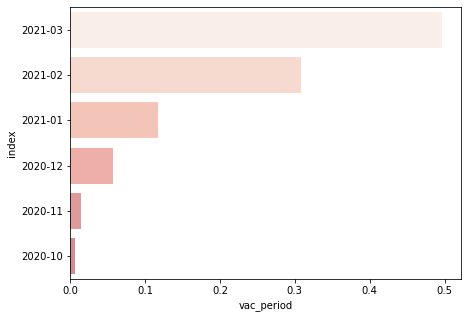

In [95]:
plt.figure(figsize=(7 ,5))
sns.barplot(x = 'vac_period', y='index', data = vac_1, alpha = 0.5, palette='Reds')

# Сколько вакансий с позициями на которых вы работаете?
### 1 вакансия подходит под то, чем я сейчас занимаюсь

In [96]:
vac_2 = vac.query('vactitle.str.lower().str.contains("аналитик") \
                    &vactitle.str.lower().str.contains("риски") \
                    & vacdescription.str.lower().str.contains("sql") \
                    ', engine = 'python')
vac_2

,id,vacid,vactitle,vacdescription,vacdate,vacstatus,vac_period
2079,385558,1531484,Аналитик по управленческой отчетности (операци...,Условия:работа в крупнейшей компании страны;м...,2021-02-17,new,2021-02


# Cколько вакансий для аналатика данных?
### 21

In [75]:
vac.query('vactitle.str.lower().str.contains("аналитик данных")', engine='python').shape[0]

21

# Сколько вакансий для аналитика данных с использованием Python?
### 8

In [77]:
vac.query('vactitle.str.lower().str.contains("аналитик данных") \
            & vacdescription.str.lower().str.contains("python") \
            ', engine='python')\
            .shape[0]

8